## 线性判别分析(LDA, Fisher)

- $ yi \in \{+1, -1\}$ 其中正为c1, 负为c2

- $ x_{c1} = \{xi|yi= +1\},  x_{c2} = \{xi|yi= -1\}, 数据总和为: N_1 + N_2 = N$

##### 类内距离小, 类间距离大

<img src="./fisher.jpg" alt="线性判别分析" style="zoom: 50%;" />

- 将p维数据投影到1维直线上, 然后进行分类, 投影公式为: $ z_i = w^Tx_i$

- 也就是 类内-> 方差足够小, 类间 -> 类均值之间的距离足够大

- 其中分类c1,c2有相同的计算公式

- 投影均值: $ \overline{z_i} = \frac{1}{Ni}\sum^{Ni}_{i=1}w^Tx_i$

- 投影方差: $ S_i = \frac{1}{Ni}\sum^{Ni}_{i=1}(z_i - \overline{z_i})(z_i - \overline{z_i})^T$

- 类间: $ (\overline{z_1} - \overline{z_2})^2$ , 类内: $ S_1 + S_2$, 目标: $$ J(w) = \frac{(\overline{z_1} - \overline{z_2})^2}{S_1 + S_2}$$

- 对 $J(w)$ 求导求极大值后, 因为可以只要w的方向, 不关心大小, 可得 $$ w \propto S^{-1}_{w}(\overline{x_1} - \overline{x_2})$$

- 其中 $S_w = S_{c1} + S_{c2}$, 是c1和c2原本方差之和, 若 $S^{-1}_{w}$是对角矩阵, 各向同性, 则会有: $$ w \propto \overline{x_1} - \overline{x_2}$$

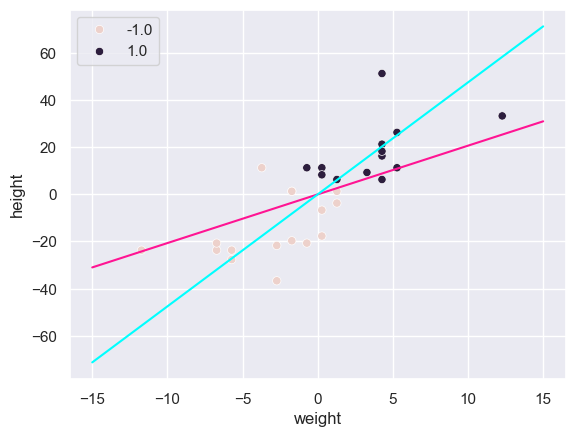

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataUrl = '.\\lineSplit.csv'
df = pd.read_csv(dataUrl)
# 正规化数据
mean = df.mean()
mean["gender"] = 0
df = df - mean
# 绘制图片
sns.set()
sns.scatterplot(x="weight", y="height", hue="gender",data=df)

c1 = df.query("gender == 1")[["weight","height"]]
c2 = df.query("gender == -1")[["weight","height"]]

mean1 = np.array(c1.mean())
mean2 = np.array(c2.mean())

# 只使用 x1 - x2
a = (mean1[1]- mean2[1])/ (mean1[0]- mean2[0])

# 计算c1和c2的方差并求逆
sn1 = np.zeros((2,2))
for x in  np.array(c1):
    x_ = x - mean1
    sn1 += np.outer(x_, x_)
sn2 = np.zeros((2,2))
for x in  np.array(c2):
    x_ = x - mean2
    sn2 += np.outer(x_, x_)
sw = (sn1/ len(c1)) + (sn2/ len(c2))
w = mean1 - mean2
s = np.dot(np.linalg.inv(sw), w)

### 绘图
x_points = np.linspace(-15,15, 10)
y_sw = (s[0]/s[1]) * x_points
sns.lineplot(x=x_points, y = y_sw, color='deeppink')
y_w = a * x_points
sns.lineplot(x=x_points, y = y_w, color='cyan')
plt.show()


#### 懵逼, 为啥上了Sw之后效果更差了